### Check the shapes of each domain in each dataset

In [3]:
import torch
import numpy as np

# dataset
from twaidata.torchdatasets.whole_brain_dataset import MRISegmentationDataset
from torch.utils.data import DataLoader, random_split, ConcatDataset

# misc
import os
import torch
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

In [4]:
torch.manual_seed(3407) # see this absolute meme of a paper: https://arxiv.org/pdf/2109.08203.pdf
torch.cuda.manual_seed_all(3407)

In [5]:
# define paths to each domain
#root_dir_wmh = "/media/benp/NVMEspare/datasets/preprocessing_attempts/local_results/WMH_challenge_dataset"
root_dir_wmh = "/disk/scratch/s2208943/data"
root_dir_eddata = "/disk/scratch/s2208943/data"
wmh_domains = ["Singapore", "Utrecht", "GE3T"]
wmh_domains = [os.path.join(root_dir_wmh, d) for d in wmh_domains]

ed_domains = ["domainA", "domainB", "domainC", "domainD"]
ed_domains = [os.path.join(root_dir_eddata, d) for d in ed_domains]

In [20]:
# load wmh datasets
datasets = [MRISegmentationDataset(d) for d in wmh_domains]

In [7]:
simg, slabel = datasets[0][0]
uimg, ulabel = datasets[1][0]
gimg, glabel = datasets[2][0]

In [8]:
simg.shape, uimg.shape, gimg.shape

(torch.Size([2, 48, 232, 256]),
 torch.Size([2, 48, 230, 230]),
 torch.Size([2, 83, 250, 158]))

In [22]:
# load ed data setasets
ed_datasets = [MRISegmentationDataset(d) for d in ed_domains]
for dataset in ed_datasets:
    img, label = dataset[0]
    print(img.shape)
    img, label = dataset[20]
    print(img.shape)
    print()

torch.Size([2, 40, 240, 240])
torch.Size([2, 40, 240, 240])

torch.Size([2, 48, 240, 240])
torch.Size([2, 48, 240, 240])

torch.Size([2, 53, 256, 256])
torch.Size([2, 53, 256, 256])

torch.Size([2, 56, 240, 240])
torch.Size([2, 56, 240, 240])



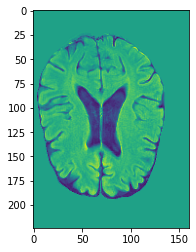

In [35]:
gimg, glabel = ed_datasets[1][8]
plt.imshow(gimg[0,25,10:234,50:210])

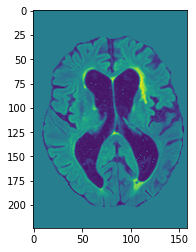

In [13]:
plt.imshow(uimg[0,25,:224,30:188])

In [14]:
# function to do train validate test split
test_proportion = 0.1
validation_proportion = 0.2

def train_val_test_split(dataset, val_prop, test_prop):
    # I thinnk the sklearn version might be prefereable for determinism and things
    # but that involves fiddling with the dataset implementation I think....
    size = len(dataset)
    test_size = int(test_prop*size) 
    val_size = int(val_prop*size)
    train_size = size - val_size - test_size
    train, val, test = random_split(dataset, [train_size, val_size, test_size])
    return train, val, test

In [23]:
# load datasets
#datasets = [MRISegmentationDataset(d) for d in wmh_domains]
datasets = [MRISegmentationDataset(d) for d in ed_domains]

# split into train, val test datasets
datasets = [train_val_test_split(dataset, validation_proportion, test_proportion) for dataset in datasets]

# concat the train val test datsets
train_dataset = ConcatDataset([ds[0] for ds in datasets])
val_dataset = ConcatDataset([ds[1] for ds in datasets])
test_dataset = ConcatDataset([ds[2] for ds in datasets])

In [24]:
len(train_dataset), len(val_dataset), len(test_dataset)

(177, 49, 24)

In [25]:
# define dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=6, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = 6, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=6, shuffle=True)

In [37]:
for img, label in train_dataset:
    # find slices where there exists a one label
    wheres = np.where(label.numpy()==1)
    print(np.min(wheres[1]), np.max(wheres[1]), label.size()[1])

6 37 40
12 36 40
5 36 40
8 36 40
8 31 40
11 39 40
4 31 40
8 35 40
7 39 40
13 35 40
13 34 40
6 31 40
12 27 40
9 36 40
6 31 40
5 36 40
7 39 40
8 36 40
10 37 40
14 39 40
8 32 40
8 29 40
8 38 40
5 30 40
8 37 40
2 35 40
5 36 40
15 31 40
6 33 40
13 35 40
9 35 40
13 32 40
9 39 40
13 28 40
8 37 40
9 33 40
12 34 48
11 43 48
12 40 48
10 41 48
16 31 48
13 43 48
10 40 48
9 30 48
13 43 48
12 34 48
11 39 48
13 39 48
9 40 48
10 31 48
12 38 48
12 36 48
9 36 48
12 30 48
17 35 53
20 38 53
10 44 48
19 37 53
15 45 53
19 41 53
14 50 53
21 44 53
20 40 53
19 47 53
19 44 53
21 46 53
14 44 48
20 44 53
12 37 48
16 46 53
19 41 49
14 39 48
17 40 53
12 42 48
19 40 53
19 47 53
12 35 48
14 41 48
18 46 53
22 43 53
13 42 48
27 40 53
12 42 48
23 47 53
17 46 53
12 38 48
17 40 53
23 36 53
15 36 53
15 43 53
13 37 48
17 48 53
11 42 48
19 42 53
19 48 53
9 43 48
13 42 48
13 44 48
20 39 56
16 48 56
25 47 56
26 37 56
16 45 56
20 48 56
16 41 56
18 37 56
21 45 56
24 45 56
17 43 56
22 45 56
17 48 56
24 41 56
20 47 56
20 44 56
32 